In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import subprocess
from matplotlib.animation import FuncAnimation

from matplotlib.colors import ListedColormap
from scipy.io import loadmat
import natsort, pathlib
import os
import glob


path_1 = os.path.abspath('../moose_files/v6/exodus/')
# path_2 = os.path.abspath('../moose_files/AgTi/')

In [ ]:
colormap_data = loadmat('cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])

### All Phases and Area data import

In [ ]:
area_df1 = pd.read_csv(path_1+'/5.csv',  encoding='utf-8')
area_df1['area_IMC_total'] =  area_df1['area_h2']+area_df1['area_h3']+area_df1['area_h4']+area_df1['area_h5']
area_df1['area_total'] =  area_df1['area_IMC_total'] + area_df1['area_h1']
real_time = np.array(area_df1['time'])/1e4 ## turning time_scale of 1e7  to 1e3 (into ms scale)
area_df1['real_time_(ms)'] = real_time 
area_df1.head()

### Loading .e file

In [ ]:
# model_path_1 = path_1+'/5.e'
# model_1 = netCDF4.Dataset(model_path_1)

# # # model_path_2 = path_2+'/3.e'
# # # model_2 = netCDF4.Dataset(model_path_2)

# # # For 5 eta
# parameters = ['vals_nod_var1', 'vals_nod_var2', 'vals_nod_var3', 'vals_nod_var4', 'vals_nod_var5', 'vals_nod_var6', 'vals_nod_var7', 'vals_nod_var8', 'vals_nod_var9']
# param_in_exodus = ['bnds',  'c', 'c1', 'c2', 'eta_1', 'eta_2', 'eta_3', 'eta_4', 'eta_5']
# param_name = ['bnds', 'universal comp', r'C$_{Ti}$', r'C$_{Cu}$', r'Ti$_{rich}$', r'CuTi$_2$$_{IMC_{1}}$', r'CuTi$_2$$_{IMC_{2}}$', r'CuTi$_2$$_{IMC_{3}}$', r'CuTi$_2$$_{IMC_{4}}$',]
# ###################

# # # ########################### For Area from .e file ################
# # # time = np.array(model_1.variables['time_whole'][:]).reshape((-1, 1))
# # # areas = np.array(model_1.variables['vals_glo_var'][:])

# # # data_of_area = np.concatenate((time, areas), axis=1)
# # # area_IMC = np.sum(areas[:, 1:4], axis=1, keepdims=True)
# # # data_of_area = np.concatenate((data_of_area, area_IMC), axis=1)
# # # data_of_area = np.concatenate((data_of_area, time/1e4), axis=1)

# # # area_df1 = pd.DataFrame(data_of_area, columns=['time', 'area_h1', 'area_h2', 'area_h3', 'area_h4', 'area_h5', 'area_IMC_total', 'real_time_(ms)'])
# # # area_df1.head()

### Organizing MOOSE exodus file and Saving it as Numpy Files

In [ ]:
# i=1
# param = model_1.variables[parameters[i]][:]

# X_all = model_1.variables['coordx'][:]
# Y_all = model_1.variables['coordy'][:]

# points = np.vstack([Y_all,X_all,param]).T

# column_names = ['X', 'Y'] + list(range(param.shape[0]))
# df = pd.DataFrame(points, columns=column_names)
# df = df.sort_values(by = ['X', 'Y'], ascending = [True, True], ignore_index=True)
# df_param = df.iloc[:, 2:]

# x_dim  = model_1.dimensions['num_nod_ns1'].size
# y_dim =  model_1.dimensions['num_nod_ns2'].size
# time_steps = model_1.dimensions['time_step'].size
# comp_uni = df_param.to_numpy().flatten().reshape(y_dim, x_dim, time_steps)
# comp_uni = np.flip(comp_uni, axis=0)
# # np.save('../numpy_files/comp_uni.npy', comp_uni)
# plt.imshow(comp_uni[:,:,0])

In [ ]:
# Ti, IMC1, IMC2, IMC3, IMC4 = [], [], [], [], []
# for i in range(5):
#     param = model_1.variables[parameters[i+4]][:]

#     X_all = model_1.variables['coordx'][:]
#     Y_all = model_1.variables['coordy'][:]
    
#     points = np.vstack([Y_all,X_all,param]).T
    
#     column_names = ['X', 'Y'] + list(range(param.shape[0]))
#     df = pd.DataFrame(points, columns=column_names)
#     df = df.sort_values(by = ['X', 'Y'], ascending = [True, True], ignore_index=True)
#     df_param = df.iloc[:, 2:]
    
#     x_dim  = model_1.dimensions['num_nod_ns1'].size
#     y_dim =  model_1.dimensions['num_nod_ns2'].size
#     time_steps = model_1.dimensions['time_step'].size
#     array_ = df_param.to_numpy().flatten().reshape(y_dim, x_dim, time_steps)
#     array = np.flip(array_, axis=0)
#     if i == 0:
#         Ti.append(array)
#     elif i == 1:
#         IMC1.append(array)
#     elif i == 2:
#         IMC2.append(array)
#     elif i == 3:
#         IMC3.append(array)
#     else:
#         IMC4.append(array)

# time = np.array(model_1.variables['time_whole'][:]).reshape((-1, ))
# Ti, IMC1, IMC2, IMC3, IMC4, time_ms = Ti[0][:,:,:], IMC1[0][:,:,:], IMC2[0][:,:,:], IMC3[0][:,:,:], IMC4[0][:,:,:], time/1e4


# # # ##########################################
# # # # Saving as Npmpy Files
# # # np.save('../numpy_files/Ti.npy', Ti)
# # # np.save('../numpy_files/IMC1.npy', IMC1)
# # # np.save('../numpy_files/IMC2.npy', IMC2)
# # # np.save('../numpy_files/IMC3.npy', IMC3)
# # # np.save('../numpy_files/IMC4.npy', IMC4)
# # # np.save('../numpy_files/time_ms.npy', time_ms)

# # # np.savez('../numpy_files/CuTi.npz', arr1=Ti, arr2=IMC1, arr3=IMC2, arr4=IMC3, arr5=IMC4, arr6=time_ms)

### Loading from Numpy File

In [ ]:
# model_1 = np.load('../numpy_files/CuTi.npz')


# Ti = model_1['arr1']
# IMC1 = model_1['arr2']
# IMC2 = model_1['arr3']
# IMC3 = model_1['arr4']
# IMC4 = model_1['arr5']
# time_ms = model_1['arr6']

# time_steps =  time_ms.shape[0]

In [ ]:
Ti =  np.load('../numpy_files/Ti.npy')
IMC1 = np.load('../numpy_files/IMC1.npy')
IMC2 = np.load('../numpy_files/IMC2.npy')
IMC3 = np.load('../numpy_files/IMC3.npy')
IMC4 = np.load('../numpy_files/IMC4.npy')
time_ms = np.load('../numpy_files/time_ms.npy')
comp_uni = np.load('../numpy_files/comp_uni.npy')

## Global Composition plot over a line

In [ ]:
t_steps = [0,100, 250,500,750,1000,1250,1500,1750,2000,2111]

for t_step in t_steps:
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8), frameon=True)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.9)
  
  cmap = plt.get_cmap('jet')
  cmap.set_under('white', alpha=0)
  hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
  cmap=cold2hot
  cmap.set_under('white', alpha=0) 
  hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  # hmap24 = ax1.imshow(comp_uni[:,:,t_step], cmap=cmap, vmin=0.1, vmax=1.0, interpolation='bilinear')
  
  if t_step <= 600:
    imc1txt3 = ax1.text(200, 360, 'IMC', fontsize = 45, weight='bold')
    imc1txt3 = ax1.text(220, 315,'G$_{1}$',  fontsize = 45, weight='bold')
    imc2txt3 = ax1.text(120,263, 'G$_{2}$',  fontsize = 40, weight='bold')
    imc3txt3 = ax1.text(320,263, 'G$_{3}$',  fontsize = 40, weight='bold')
    imc4txt3 = ax1.text(220,130, 'G$_{4}$',  fontsize = 45, weight='bold')
    imc4txt3 = ax1.text(85,30, 'HCP',  fontsize = 45, weight='bold', color='white')
  else:
    imc1txt3 = ax1.text(205, 360, 'IMC', fontsize = 45, weight='bold')
    imc1txt3 = ax1.text(220, 315,'G$_{1}$',  fontsize = 50, weight='bold')
    imc2txt3 = ax1.text(120,265, 'G$_{2}$',  fontsize = 50, weight='bold')
    imc3txt3 = ax1.text(320,265, 'G$_{3}$',  fontsize = 50, weight='bold')
    imc4txt3 = ax1.text(220,130, 'G$_{4}$',  fontsize = 50, weight='bold')
    imc4txt3 = ax1.text(85,12, 'HCP',  fontsize = 45, weight='bold', color='white')
  ax1.hlines(y=250, xmin=0, xmax=500, linewidth=5, linestyle='--', color='blue')
  ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
  ax1.set_xlabel(r'$\mathbf{\longleftarrow}$    500     $\mathbf{nm}$$\mathbf{\longrightarrow}$', fontsize = 45, weight ='bold', color='k')
  ax1.annotate(r'$\mathbf{\longleftarrow}$    500     $\mathbf{nm}$$\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.05, 0.5), rotation=90, color='k', xycoords='axes fraction', textcoords='axes fraction', fontsize = 45, weight = 'bold', ha='center', va='center')
  # ax1.annotate(r'$\leftarrow$500 $\mathbf{nm}$$\rightarrow$', xy=(0.5, 0.5), xytext=(0.5, -0.1), rotation=0, color='k', xycoords='axes fraction', textcoords='axes fraction', fontsize = 45, weight = 'bold', ha='center', va='center')
  ax1.set_ylim(0, 500)    
  ax1.set_xlim(0, 500)
  
  ###############################################
  # ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
  ax2.plot(comp_uni[225,:,t_step], color='blue', linestyle='--', linewidth=8, label=r'c$\mathbf{_{Cu}}$')
  ax2.set_ylim(-0.05, 1.05)    
  ax2.set_xlim(-20, 520)
  ax2.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=['0.00', '0.25', '0.50', '0.75', '1.00'], size=30, color='k', weight='bold')
  ax2.set_xticks([0, 125, 250, 375, 500], labels=['0', '125', '250', '375', '500'], size=30, color='k', weight='bold')
  
  ax2.set_xlabel(r'x  [nm]$\mathbf{\longrightarrow}$ ', fontsize = 45, weight ='bold', color='k')
  ax2.set_ylabel(r'C$\mathbf{_{Cu} \longrightarrow}$', fontsize = 65, weight ='bold', color='k')
  ax2.grid(alpha=0.2)
  ax2.legend(loc=(0.1, 0.7), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'50',}, 
             handletextpad=0.5, handlelength=1.5,   frameon=False)#.get_frame().set_facecolor('none')
  
  
  
  
  fig.text(0.43, 0.52, '- - - - - - - - - - - - - - - - - - - - - ', ha='center', va='center', fontsize=40, rotation=90, color='k')
  plt.tight_layout()
  plt.savefig(f'figures/composition/jpg/Ti2Cu_t{time_ms[t_step]:.0f}ms.jpg')
  plt.savefig(f'figures/composition/Ti2Cu_t{time_ms[t_step]:.0f}ms.png', format='png', dpi=800)
  print(f'{time_ms[t_step]:.0f}ms')
  plt.close()
  # plt.show()


## $\eta_1$ plot over a line

In [ ]:
t_steps = [0,100, 250,500,750,1000,1250,1500,1750,2000,2111]
for t_step in t_steps:

  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,8), frameon=True)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.9)
  
  cmap = plt.get_cmap('gist_ncar_r')
  cmap.set_under('white', alpha=0)
  hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
  cmap=plt.get_cmap('gist_ncar')
  cmap.set_under('white', alpha=0) 
  hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  if t_step <= 600:
    imc1txt3 = ax1.text(200, 360, 'IMC', fontsize = 45, weight='bold')
    imc1txt3 = ax1.text(220, 315,'G$_{1}$',  fontsize = 45, weight='bold')
    imc2txt3 = ax1.text(120,263, 'G$_{2}$',  fontsize = 40, weight='bold')
    imc3txt3 = ax1.text(320,263, 'G$_{3}$',  fontsize = 40, weight='bold')
    imc4txt3 = ax1.text(220,130, 'G$_{4}$',  fontsize = 45, weight='bold')
    imc4txt3 = ax1.text(85,30, r'HCP ($\eta_1$)',  fontsize = 45, weight='bold', color='white')
  else:
    imc1txt3 = ax1.text(205, 360, 'IMC', fontsize = 45, weight='bold')
    imc1txt3 = ax1.text(220, 315,'G$_{1}$',  fontsize = 50, weight='bold')
    imc2txt3 = ax1.text(120,265, 'G$_{2}$',  fontsize = 50, weight='bold')
    imc3txt3 = ax1.text(320,265, 'G$_{3}$',  fontsize = 50, weight='bold')
    imc4txt3 = ax1.text(220,130, 'G$_{4}$',  fontsize = 50, weight='bold')
    imc4txt3 = ax1.text(85,12, r'HCP ($\eta_1$)',  fontsize = 45, weight='bold', color='white')
  ax1.hlines(y=250, xmin=0, xmax=500, linewidth=5, linestyle=':', color='orangered')
  ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
  ax1.set_xlabel(r'$\mathbf{\longleftarrow}$    500     $\mathbf{nm}$$\mathbf{\longrightarrow}$', fontsize = 45, weight ='bold', color='k')
  ax1.annotate(r'$\mathbf{\longleftarrow}$    500     $\mathbf{nm}$$\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.05, 0.5), rotation=90, color='k', xycoords='axes fraction', textcoords='axes fraction', fontsize = 45, weight = 'bold', ha='center', va='center')
  # ax1.annotate(r'$\leftarrow$500 $\mathbf{nm}$$\rightarrow$', xy=(0.5, 0.5), xytext=(0.5, -0.1), rotation=0, color='k', xycoords='axes fraction', textcoords='axes fraction', fontsize = 45, weight = 'bold', ha='center', va='center')
  ax1.set_ylim(0, 500)    
  ax1.set_xlim(0, 500)
  
  ###############################################
  # ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
  
  eta1 = Ti[225,:,t_step]
  eta1[:][eta1[:] < 0], eta1[:][eta1[:] > 1] = 0, 1
  ax2.plot(eta1[:], color='orangered', linestyle='--', marker='o',  linewidth=8, label=r'$\mathbf{\eta_1}$')
  ax2.set_ylim(-0.05, 1.05)    
  ax2.set_xlim(-20, 520)
  ax2.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=['0.00', '0.25', '0.50', '0.75', '1.00'], size=30, color='k', weight='bold')
  ax2.set_xticks([0, 125, 250, 375, 500], labels=['0', '125', '250', '375', '500'], size=30, color='k', weight='bold')
  
  ax2.set_xlabel(r'x  [nm]$\mathbf{\longrightarrow}$ ', fontsize = 45, weight ='bold', color='k')
  ax2.set_ylabel(r'$\mathbf{\eta_{1} \longrightarrow}$', fontsize = 65, weight ='bold', color='k')
  ax2.grid(alpha=0.2)
  ax2.legend(loc=(0.80, 0.01), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, 
             handletextpad=0.5, handlelength=1.0,   frameon=True)#.get_frame().set_facecolor('none')
  
  del eta1
  
  fig.text(0.43, 0.52, '- - - - - - - - - - - - - - - - - - - - - ', ha='center', va='center', fontsize=40, rotation=90, color='k')
  plt.tight_layout()
  plt.savefig(f'figures/eta/jpg/Ti2Cu_t{time_ms[t_step]:.0f}ms.jpg')
  plt.savefig(f'figures/eta/Ti2Cu_t{time_ms[t_step]:.0f}ms.png', format='png', dpi=800)
  print(f'{time_ms[t_step]:.0f}ms')
  plt.close()
  # plt.show()


## $\eta_1$ & global composition plot over a line

In [ ]:
t_steps = [0,100, 250,500,750,1000,1250,1500,1750,2000,2111]

for t_step in t_steps:

  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8), frameon=True)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.9)
  
  cmap = plt.get_cmap('gist_ncar_r')
  cmap.set_under('white', alpha=0)
  hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
  cmap=plt.get_cmap('gist_ncar')
  cmap.set_under('white', alpha=0) 
  hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.5, vmax=0.6, interpolation='bilinear')
  if t_step <= 600:
    imc1txt3 = ax1.text(200, 360, 'IMC', fontsize = 45, weight='bold')
    imc1txt3 = ax1.text(220, 315,'G$_{1}$',  fontsize = 45, weight='bold')
    imc2txt3 = ax1.text(120,263, 'G$_{2}$',  fontsize = 40, weight='bold')
    imc3txt3 = ax1.text(320,263, 'G$_{3}$',  fontsize = 40, weight='bold')
    imc4txt3 = ax1.text(220,130, 'G$_{4}$',  fontsize = 45, weight='bold')
    imc4txt3 = ax1.text(85,30, r'HCP ($\eta_1$)',  fontsize = 45, weight='bold', color='white')
  else:
    imc1txt3 = ax1.text(205, 360, 'IMC', fontsize = 45, weight='bold')
    imc1txt3 = ax1.text(220, 315,'G$_{1}$',  fontsize = 50, weight='bold')
    imc2txt3 = ax1.text(120,265, 'G$_{2}$',  fontsize = 50, weight='bold')
    imc3txt3 = ax1.text(320,265, 'G$_{3}$',  fontsize = 50, weight='bold')
    imc4txt3 = ax1.text(220,130, 'G$_{4}$',  fontsize = 50, weight='bold')
    imc4txt3 = ax1.text(85,12, r'HCP ($\eta_1$)',  fontsize = 45, weight='bold', color='white')
  ax1.hlines(y=250, xmin=0, xmax=500, linewidth=5, linestyle='--', color='red')
  ax1.vlines(x=250, ymin=0, ymax=500, linewidth=5, linestyle='--', color='lime')
  ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
  ax1.set_xlabel(r'$\mathbf{\longleftarrow}$    500     $\mathbf{nm}$$\mathbf{\longrightarrow}$', fontsize = 45, weight ='bold', color='k')
  ax1.annotate(r'$\mathbf{\longleftarrow}$    500     $\mathbf{nm}$$\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.05, 0.5), rotation=90, color='k', xycoords='axes fraction', textcoords='axes fraction', fontsize = 45, weight = 'bold', ha='center', va='center')
  # ax1.annotate(r'$\leftarrow$500 $\mathbf{nm}$$\rightarrow$', xy=(0.5, 0.5), xytext=(0.5, -0.1), rotation=0, color='k', xycoords='axes fraction', textcoords='axes fraction', fontsize = 45, weight = 'bold', ha='center', va='center')
  ax1.set_ylim(0, 500)    
  ax1.set_xlim(0, 500)
  
  ###############################################
  # ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
  ax2.plot(comp_uni[225,:,t_step], color='red', linestyle='--', linewidth=8, label=r'c$\mathbf{_{Cu}}$')
  ax2.set_ylim(-0.05, 1.05)    
  ax2.set_xlim(-20, 520)
  ax2.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=['0.00', '0.25', '0.50', '0.75', '1.00'], size=30, color='k', weight='bold')
  ax2.set_xticks([0, 125, 250, 375, 500], labels=['0', '125', '250', '375', '500'], size=30, color='k', weight='bold')
  
  ax2.set_xlabel(r'x | y  [nm]$\mathbf{\longrightarrow}$ ', fontsize = 45, weight ='bold', color='k')
  ax2.set_ylabel(r'C$\mathbf{_{Cu} \longrightarrow}$', fontsize = 65, weight ='bold', color='k')
  ax2.grid(alpha=0.2)
  ax2.legend(loc=(0.01, 0.8), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, 
             handletextpad=0.5, handlelength=1.0,   frameon=True)#.get_frame().set_facecolor('none')
  ###################################
  ax3=ax2.twinx()
  ax3.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=['0.00', '0.25', '0.50', '0.75', '1.00'], size=30, color='k', weight='bold')
  ax3.set_ylabel(r'$\mathbf{\eta_{1} \longrightarrow}$', fontsize = 65, weight ='bold', color='k')
  ax3.set_ylim(-0.05, 1.05)    
  eta1 = Ti[:,255,t_step]
  eta1[:][eta1[:] < 0], eta1[:][eta1[:] > 1] = 0, 1
  ax3.plot(eta1[:], color='lime', linestyle='--', marker='o',  linewidth=8, label=r'$\mathbf{\eta_1}$')
  ax3.legend(loc=(0.80, 0.80), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, 
             handletextpad=0.5, handlelength=1.0,   frameon=True)#.get_frame().set_facecolor('none')
  # ax3.set_xlabel(r'y  [nm]$\mathbf{\longrightarrow}$ ', loc='top', fontsize = 45, weight ='bold', color='k')
  
  # ax2.set_xlabel('X-axis Label', position=(0.5, 1.02), ha='center', va='bottom')
  
  ax3.tick_params(axis='x', which='both', bottom=False, top=True)
  # ax3.set_xticks([0, 125, 250, 375, 500], labels=['0', '125', '250', '375', '500'], size=30, color='k', weight='bold')
  
  
  
  
  
  
  
  
  fig.text(0.38, 0.52, '- - - - - - - - - - - - - - - - - - - - - ', ha='center', va='center', fontsize=40, rotation=90, color='k')
  plt.tight_layout()
  plt.savefig(f'figures/comp_eta/jpg/Ti2Cu_t{time_ms[t_step]:.0f}ms.jpg')
  plt.savefig(f'figures/comp_eta/Ti2Cu_t{time_ms[t_step]:.0f}ms.png', format='png', dpi=800)
  print(f'{time_ms[t_step]:.0f}ms')
  plt.close()
  # plt.show()


## Area Plot

In [ ]:
area_df1.tail()

In [ ]:
min(area_df1['area_total'])

In [ ]:
area_df1['real_time_(ms)'][-1:]

In [ ]:
t_step = real_time.shape[0]
fig, ax1 = plt.subplots(1, 1, figsize=[12, 8]) #figsize=[8, 10])
hmap_total = ax1.plot(real_time[:t_step], area_df1['area_total'][:t_step], color='teal', label=r'Total Area', linestyle='-', linewidth=8)
hmap_IMC = ax1.plot(real_time[:t_step], area_df1['area_IMC_total'][:t_step], color='orange', label=r'IMC', linewidth=8)
# hmap_HCP = ax1.plot(real_time[:t_step], area_df1['area_h1'][:t_step], color='blue', label=r'HCP', linewidth=8)
# legend_1 = ax1.legend( loc=(0.7,0.8), prop={'weight':'bold', 'size':'18',}, handlelength=1.0, handletextpad=1.0, frameon=True)
ax1.legend(loc=(0.05, 0.64), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'35',},  handletextpad=0.5, handlelength=2.0,   frameon=True)#

ax1.set_xlabel(r"t [ms] $\mathbf{\longrightarrow}$", weight = 'bold', size=45, color='k')
ax1.set_ylabel(r"Area [nm$\mathbf{^2}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=45, color='k')
ax1.get_yaxis().get_offset_text().set_position((-0.01, 0))

ax1.set_yticks([0, 1.25e5, 2.5e5], labels=[ '0.0', '1.25', '2.5'], size=35, color='k', rotation=0,  weight='bold')
ax1.set_title(r'$\mathbf{\times}$10$\mathbf{^{5}}$', pad=0, loc='left', color='black', fontsize=35, weight='bold')
ax1.set_xticks([0, 1250, 2500, 3750, 5000], labels=['0', '1250', '2500', '3750', '5000'], size=30, color='k', weight='bold')

ax1.set_ylim(-0.1e5, 2.6e5)
ax1.set_xlim(-200, 5400)
ax1.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', length=5, width=5)

# ax1.hlines(y=0, xmin=-150, xmax=5400, linestyle='-', linewidth=1, color='k')

ax1.plot(3750, 2.43e5, marker='^', color='green', markersize=15)
ax1.plot(3750, 1.08e5, marker='v', color='green', markersize=15)
ax1.vlines(x=3750, ymin=1.1e5, ymax=2.4e5, linewidth=5.5, linestyle='--', color='green')
ax1.text(x=3500, y = 1.35e5, s=r'Area HCP', rotation=90, fontsize=30, weight='bold', color='green')


ax1.plot(3750, 0.92e5, marker='^', color='orangered', markersize=15)
ax1.plot(3750, 5000, marker='v', color='orangered', markersize=15)
ax1.vlines(x=3750, ymin=8000, ymax=0.91e5, linewidth=5.5, linestyle='--', color='orangered')
ax1.text(x=3800, y = 0.08e5, s=r'Area IMC', rotation=270, fontsize=30, weight='bold', color='orangered')

ax1.grid()
plt.tight_layout()
# plt.savefig('figures/free_energy_N_area_evolve/jpg/area.jpg',bbox_inches='tight')
# plt.savefig('figures/free_energy_N_area_evolve/area.png',bbox_inches='tight', transparent=True, dpi=800)
plt.show()

# Free Energy

In [ ]:
##In case jupyter cannot find module that is otherwise found in terminal
## pip3 install ipykernel --upgrade
## python3 -m ipykernel install --user
##https://stackoverflow.com/questions/50914761/jupyter-notebook-cant-find-modules-for-python-3-6
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database,equilibrium, calculate, variables as v
from pycalphad.plot.utils import phase_legend
import numpy as np
import pandas as pd 
#Page 182 http://www.fizika.unios.hr/rf/wp-content/uploads/sites/67/2011/02/CPwP.pdf
#%matplotlib inline
#import pandas as pd
import scipy
#import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
# plt.rcParams["figure.figsize"]=(12, 10)

In [ ]:
dbf = Database('CuTi_database.TDB')
comps = ['CU', 'TI', 'VA']
phases = ['FCC_A1']

calc_result = calculate(dbf, comps, phases, P=101325, T=[1250])    ### T = 1525.15  https://aip.scitation.org/doi/abs/10.1063/1.89819 , Singhal et. al. 
print(calc_result)
varT="1150"

In [ ]:
#print(calc_result.X.values)
# composition in mole fraction 
xcomp = calc_result.X.values

print(xcomp)

In [ ]:
xcomp.shape

In [ ]:
xcompr=np.reshape(xcomp,(4002,2))
xcompr.shape

In [ ]:
dfx_comp = pd.DataFrame(xcompr, columns = ['x_Cu','x_Ti'])
dfx_comp.head()

In [ ]:
gibbs = calc_result.GM.values

print(gibbs, gibbs.shape)

gibbsr=np.reshape(gibbs,(4002))

print(gibbsr)

In [ ]:
df_gibbs = pd.DataFrame(gibbsr, columns = ['G_FCC_A1'])
df_gibbs.head()

In [ ]:
min( df_gibbs['G_FCC_A1'])

In [ ]:
df1=dfx_comp
df1["G_FCC_A1"]=df_gibbs["G_FCC_A1"]
df1.head()

# df2=df1.loc[df1['xau'] < 0.15]

df2 = df1

df2.head()

In [ ]:
plt.plot(df2['x_Cu'], df2['G_FCC_A1'])
plt.vlines(x=0.33, ymin=-70000, ymax=-50000, linestyle='--', color='red', linewidth=3)
plt.vlines(x=0.67, ymin=-70000, ymax=-50000, linestyle='--', color='green', linewidth=3)

#### CuTi$_2$

In [ ]:
df2[(df2['x_Cu'] >= 0.329) & (df2['x_Cu'] <=  0.331)]

In [ ]:
df2['x_Cu'][163]

In [ ]:
df2[df2['x_Cu'] == 0.3301650825412741]

In [ ]:
df2[df2['x_Cu'] == 0.08054027013507593]

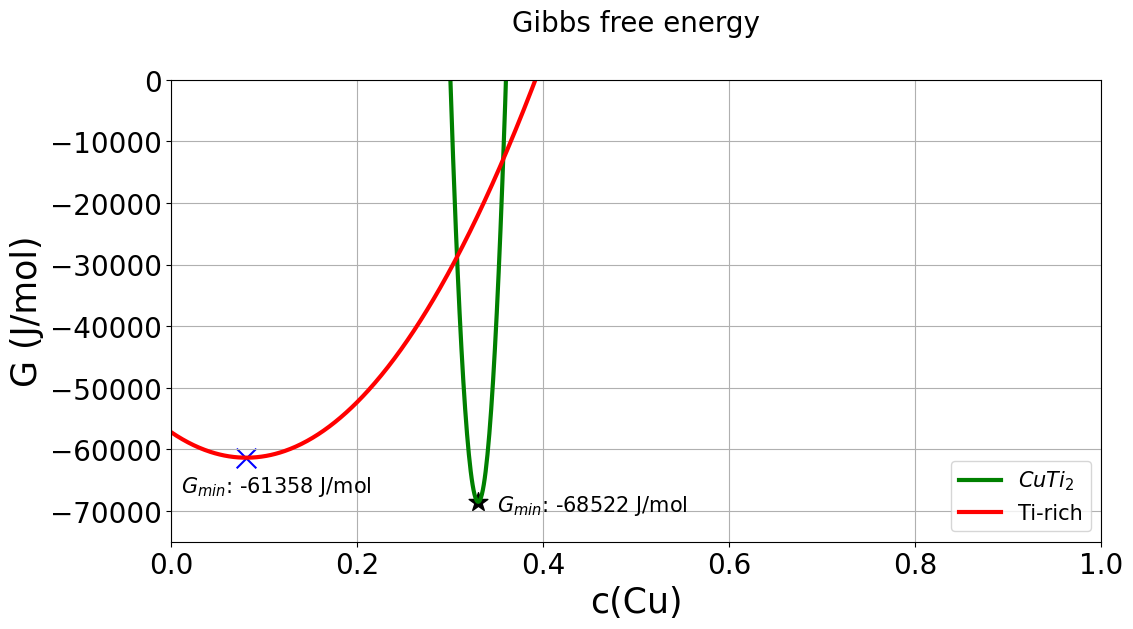

In [2]:
X = np.arange(0.0, 1.0, 0.001) #Changes the equation to  whole range

A1, B1, C1, D1, x1e, Th1 = -3.1, -2.5, 3.6, 3.7, 0.7015, -14950.7 ## Ti rich
A2, B2, C2, D2, x2e, Th2 = -295,   -2.5, 3.6, 3.7, 1.22526, -19006 ## IMC

G_FCC1= Th1*(A1*(D1*X - x1e)**2 + B1*(D1*X - x1e) + C1)
G_FCC2= Th2*(A2*(D2*X - x2e)**2 + B2*(D2*X - x2e) + C2)

plt.rcParams["figure.figsize"]=(12, 6)
plt.plot(X, G_FCC2, color='green', linewidth=3, label=r"$CuTi_2$")

plt.plot(X, G_FCC1, color='red', linewidth=3, label="Ti-rich")
plt.legend(loc=4, prop={'size': 15})
plt.grid()
plt.title("Gibbs free energy",fontsize=20, pad= 35)

plt.text(0.01,-67000,r'$G_{min}$'+f': {min(G_FCC1):.0f} J/mol', fontsize=15)
plt.scatter(x=0.08, y=int(f'{min(G_FCC1):.0f}'), marker='x', s=200, color='b')

plt.text(0.35,-70000,r'$G_{min}$'+f': {min(G_FCC2):.0f} J/mol', fontsize=15)
plt.scatter(x=0.33, y=int(f'{min(G_FCC2):.0f}'), marker='*', s=200, color='k')

plt.xticks(fontsize=20)
plt.xlabel("c(Cu)",fontsize=25)
plt.yticks(fontsize=20)
plt.ylabel("G (J/mol)",fontsize=25)
plt.xlim(0,1)
plt.ylim(-75000,0)

plt.show()

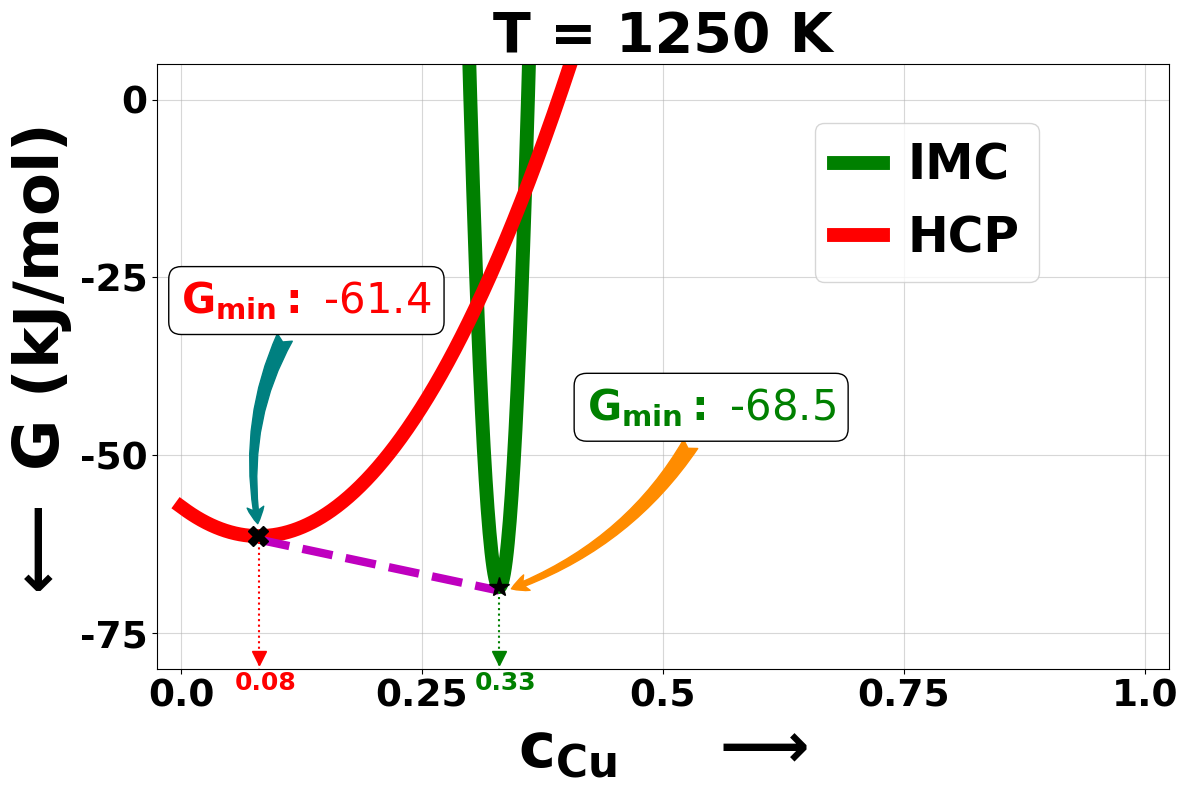

In [3]:
X = np.arange(0.0, 1.0, 0.001) #Changes the equation to  whole range

A1, B1, C1, D1, x1e, Th1 = -3.1, -2.5, 3.6, 3.7, 0.7015, -14950.7 ## Ti rich
A2, B2, C2, D2, x2e, Th2 = -295,   -2.5, 3.6, 3.7, 1.22526, -19006 ## IMC

G_FCC1= Th1*(A1*(D1*X - x1e)**2 + B1*(D1*X - x1e) + C1)
G_FCC2= Th2*(A2*(D2*X - x2e)**2 + B2*(D2*X - x2e) + C2)

fig, ax1 = plt.subplots(1,1, figsize=(12,8), frameon=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
ax1.grid(alpha=0.5)

point1 = [X[np.argmin(G_FCC1)], min(G_FCC1)]
point2 = [X[np.argmin(G_FCC2)], min(G_FCC2)]
x_values = [point1[0], point2[0]]
y_values = [point1[1]-500, point2[1]-500]

label1 = [r"$\mathbf{Ti_2Cu}$", r"IMC"]
label2 = [r"Ti-rich", r"HCP"]

ax1.plot(X, G_FCC2, color='green', linewidth=10, label=label1[1])
ax1.plot(X, G_FCC1, color='red', linewidth=10, label=label2[1])
ax1.plot(x_values, y_values,  linestyle="--", linewidth=6, markersize=20, color='m')

# ax1.text(point1[0]*0.8, point1[1]*1.15, "A", fontsize=30, color='k', weight='bold')
# ax1.text(point2[0]*0.95, point2[1]*1.12, "B", fontsize=30, color='k', weight='bold')



ax1.plot(0.08, int(f'{min(G_FCC1):.0f}'), marker='X', color='k', markersize=15, markeredgecolor='k', markerfacecolor='k')
ax1.plot(0.33, int(f'{min(G_FCC2):.0f}'), marker='*', color='k', markersize=15, markeredgecolor='k', markerfacecolor='k')

ax1.annotate(r'$\mathbf{G_{min}:}$ '+f'{min(G_FCC1)/1000:.1f}', horizontalalignment='center',
             xy = (0.08, -60000), xytext = (0.13, -30000), bbox=dict(boxstyle="round", fc="w",), arrowprops=dict(arrowstyle='Fancy', color='teal', fc='teal', connectionstyle='arc3, rad=0.2'), fontsize=30, color='red')

ax1.annotate(r'$\mathbf{G_{min}:}$ '+f'{min(G_FCC2)/1000:.1f}', horizontalalignment='center',
             xy = (0.34, -68900), xytext = (0.55, -45000), bbox=dict(boxstyle="round", fc="w",), arrowprops=dict(arrowstyle='Fancy', color='darkorange', fc='darkorange', connectionstyle='arc3, rad=-0.2'), fontsize=30, color='green')


ax1.vlines(x=point1[0], ymin=-85000, ymax=-62000, linestyle = ':', color='r')
ax1.vlines(x=point2[0], ymin=-85000, ymax=-69000, linestyle = ':', color='g')
ax1.text(x=point1[0]-0.025, y=-83000, s=f'{point1[0]:.2f}', fontsize=18, weight='bold', color='red')
ax1.text(x=point2[0]-0.025, y=-83000, s=f'{point2[0]:.2f}', fontsize=18, weight='bold', color='green')

ax1.legend(loc=(0.65, 0.64), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'35',},  handletextpad=0.5, handlelength=1.0,   frameon=True)#

ax1.set_xlim(-0.025,1.025)
ax1.set_ylim(-80000,5000)
ax1.set_xlabel(r"c$\mathbf{_{Cu}}$    $\mathbf{\longrightarrow}$", color='k', weight='bold',  fontsize=45)
ax1.set_ylabel(r"$\mathbf{\longleftarrow}$ G (kJ/mol)", color='k', weight='bold',  fontsize=45)
ax1.set_title("T = 1250 K", fontsize=40, pad= 0, weight='bold')
ax1.set_xticks([0, 0.25, 0.5, 0.75, 1.0], labels=['0.0', '0.25', '0.5', '0.75', '1.0'], size=27, color='k', weight='bold')
ax1.set_yticks([0, -25000, -50000, -75000,], labels=['0', '-25', '-50', '-75',], size=27, color='k', weight='bold')
# ax1.set_title("Gibbs free energy",fontsize=40, pad= 35, weight='bold')

ax1.plot(point1[0], -78500, marker='v', color='red', markersize=10)
ax1.plot(point2[0], -78500, marker='v', color='green', markersize=10)

plt.tight_layout()

# plt.savefig('figures/free_energy_N_area_evolve/jpg/free_energy.jpg',bbox_inches='tight')
# plt.savefig('figures/free_energy_N_area_evolve/free_energy.png',bbox_inches='tight', transparent=True, dpi=800)

plt.show()

In [ ]:
Th2*A2*D2**2, Th2*B2*D2,   Th2*C2, x2e/D2

# Equivalent c$_{ij}$

In [1]:
import numpy as np
import sympy as sym
from sympy import symbols, I, expand, Poly, simplify
import matplotlib.pyplot as plt

from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
A0 = 634492.7573
B0 = 138293.975
C0 = -53822.52
x01 = 0.1896
x02 = 0.1896

A1 = 76756681.3
B1 = 175805.5
C1 = -68421.6
x11 = 0.3312
x12 = 0.3312

In [14]:
A0 = widgets.FloatSlider(description='A0:',  value=634492.7573, min=500000, max=750000, step=1000, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
B0 = widgets.FloatSlider(description='B0:',  value=138293.975, min=100000, max=150000, step=1000, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
C0 = widgets.FloatSlider(description='C0:',  value=-53822.52, min=-60000, max=-40000, step=1000, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
x01 = widgets.FloatSlider(description='x01:',value=0.1896, min=0, max=1,  step=0.0001, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
x02 = widgets.FloatSlider(description='x02:',value=0.1896, min=0, max=1,  step=0.0001, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)

A1 = widgets.FloatSlider(description='A1:',  value=76756681.3, min=70000000, max=80000000, step=1000, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
B1 = widgets.FloatSlider(description='B1:',  value=175805.5, min=100000, max=200000, step=1000, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
C1 = widgets.FloatSlider(description='C1:',  value=-68421.6, min=-75000, max=-60000, step=1000, continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
x11 = widgets.FloatSlider(description='x11:',value=0.3312, min=0, max=1,  step=0.0001,   continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)
x12 = widgets.FloatSlider(description='x12:',value=0.3312, min=0, max=1,  step=0.0001,  continuous_update=True, orientation='horizontal', readout_format='.3f',  readout=True,disabled=False)


ui0 = widgets.HBox([A0, B0, C0, x01, x02])
ui1 = widgets.HBox([A1, B1, C1, x11, x12])


def Parabola(A0, B0, C0, x01, x02, A1, B1, C1, x11, x12, xeq1, yeq1, xeq2, yeq2):
    X = np.linspace(0, 1, 1000)
    y0 = A0*(X-x01)**2 + B0*(X-x02) + C0
    y1 = A1*(X-x11)**2 + B1*(X-x12) + C1

    fig, ax1 = plt.subplots(1,1, figsize=(12,8), frameon=True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
    ax1.grid(alpha=0.5)
    
    point1 = [X[np.argmin(y0)], min(y0)]
    point2 = [X[np.argmin(y1)], min(y1)]
    # point1 = [xeq1, yeq1]
    # point2 = [xeq2, yeq2]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1]-500, point2[1]-500]
    
    label1 = [r"$\mathbf{Ti_2Cu}$", r"IMC"]
    label2 = [r"Ti-rich", r"HCP"]
    
    ax1.plot(X, y1, color='green', linewidth=10, label=label1[1])
    ax1.plot(X, y0, color='red', linewidth=10, label=label2[1])
    ax1.plot(x_values, y_values,  linestyle="--", linewidth=6, markersize=20, color='m')
    
    # ax1.plot([xeq1, xeq2], [yeq1, yeq2],  linestyle="--", linewidth=6, markersize=20, color='m')
    
    ax1.text(point1[0]*0.8, point1[1]*1.15, "A", fontsize=30, color='k', weight='bold')
    ax1.text(point2[0]*0.95, point2[1]*1.12, "B", fontsize=30, color='k', weight='bold')
    
    

    ax1.plot(x_values[0], int(f'{min(y0):.0f}'), marker='X', color='k', markersize=15, markeredgecolor='k', markerfacecolor='k')
    ax1.plot(x_values[1], int(f'{min(y1):.0f}'), marker='*', color='k', markersize=15, markeredgecolor='k', markerfacecolor='k')
    
    ax1.annotate(r'$\mathbf{G_{min}:}$ '+f'{min(y0)/1000:.1f}', horizontalalignment='center',
                 xy = (x_values[0], min(y0)+1000), xytext = (0.13, -30000), bbox=dict(boxstyle="round", fc="w",), arrowprops=dict(arrowstyle='Fancy', color='teal', fc='teal', connectionstyle='arc3, rad=0.2'), fontsize=30, color='red')
    
    ax1.annotate(r'$\mathbf{G_{min}:}$ '+f'{min(y1)/1000:.1f}', horizontalalignment='center',
                 xy = (x_values[1]+0.012, min(y1)+500), xytext = (0.65, -45000), bbox=dict(boxstyle="round", fc="w",), arrowprops=dict(arrowstyle='Fancy', color='darkorange', fc='darkorange', connectionstyle='arc3, rad=-0.2'), fontsize=30, color='green')
    
    
    ax1.vlines(x=point1[0], ymin=-85000, ymax=min(y0)-500, linestyle = ':', color='r')
    ax1.vlines(x=point2[0], ymin=-85000, ymax=min(y1)-500, linestyle = ':', color='g')
    ax1.text(x=point1[0]-0.025, y=-83000, s=f'{point1[0]:.2f}', fontsize=18, weight='bold', color='red')
    ax1.text(x=point2[0]-0.025, y=-83000, s=f'{point2[0]:.2f}', fontsize=18, weight='bold', color='green')
    
    ax1.legend(loc=(0.65, 0.64), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'35',},  handletextpad=0.5, handlelength=1.0,   frameon=True)#
    
    ax1.set_xlim(-0.025,1.025)
    ax1.set_ylim(-80000,5000)
    ax1.set_xlabel(r"c$\mathbf{_{Cu}}$    $\mathbf{\longrightarrow}$", color='k', weight='bold',  fontsize=45)
    ax1.set_ylabel(r"$\mathbf{\longleftarrow}$ G (kJ/mol)", color='k', weight='bold',  fontsize=45)
    ax1.set_title("T = 1250 K", fontsize=40, pad= 0, weight='bold')
    ax1.set_xticks([0, 0.25, 0.5, 0.75, 1.0], labels=['0.0', '0.25', '0.5', '0.75', '1.0'], size=27, color='k', weight='bold')
    ax1.set_yticks([0, -25000, -50000, -75000,], labels=['0', '-25', '-50', '-75',], size=27, color='k', weight='bold')
    
    ax1.plot(point1[0], -78500, marker='v', color='red', markersize=10)
    ax1.plot(point2[0], -78500, marker='v', color='green', markersize=10)
    
    plt.tight_layout()
    plt.show()
    
    return()

In [4]:
x, y, m, c  = symbols('x, y, m, c') 

L = m * x + c   ### It is the common tangent between 2 parabolas whose eqn is to find

P0 = expand(A0.value*(x-x01.value)**2 + B0.value*(x-x02.value) + C0.value)  # First Parabola in Ax^2 + Bx + C form
P1 = expand(A1.value*(x-x11.value)**2 + B1.value*(x-x12.value) + C1.value)  # Second Parabola  in Ax^2 + Bx + C form

eq0 = sym.Eq(y, P0)  #eq0 ==> Equation 0 i.e. First Parabola in format y = Ax^2 + Bx + C
eq1 = sym.Eq(y, P1)  #eq1 ==> Equation 1 i.e. Second Parabola in format y = Ax^2 + Bx + C

display(eq0, eq1) 

coeffs0 = Poly(P0, x).coeffs()  # Coefficients of First Parabola P0 
coeffs1 = Poly(P1, x).coeffs()  # Coefficients of Second Parabola P1  

a0, b0, c0 =  coeffs0[0], coeffs0[1], coeffs0[2]   # First Parabola's coefficients a0 ==> A, b0 ==> B, c0 ==>c
a1, b1, c1 =  coeffs1[0], coeffs1[1], coeffs1[2]

Eq(y, 634492.7573*x**2 - 102305.67856816*x - 57234.2105017384)

Eq(y, 76756681.3*x**2 - 50667820.19312*x + 8293056.03318067)

In [5]:
## This function returns the equation of discriminant i.e. beta^2 - 4 * alpha * gamma as in above

def calculate(A,B,C):
    m, c = symbols('m, c') 
    alpha = A
    beta  = B - m
    gamma = C - c
    discriminant = beta**2 - 4* alpha * gamma
    equation = sym.Eq(discriminant,0)
    return equation

In [6]:
D0 = calculate(a0,b0,c0)   ## Discriminant from 1st Parabola
D1 = calculate(a1,b1,c1)   ## Discriminant from 2st Parabola

display(D0, D1)

Eq(2537971.0292*c + 10466451867.2917*(-9.77462848588372e-6*m - 1)**2 + 145258768132.547, 0)

Eq(307026725.2*c + 2.56722800312234e+15*(-1.97363927674115e-8*m - 1)**2 - 2.54618983576756e+15, 0)

In [7]:
result = sym.solve([D0,D1],(m,c))
print(result)

[(-27533.7565393086, -59437.0884146717), (665868.545404405, -289739.480099658)]


In [8]:
## Here 1st Calculation in this code is done between First Parabola P0 & Second Parabola P1

m00, m01 =  result[0][0], result[1][0]   ## m01 == > '1' --> Second Slope of '0' First Calculation of slope in this code 
c00, c01 = result[0][1], result[1][1]

## 2 sets of common tangents lines equations are
L00 = m00 * x + c00
L01 = m01 * x + c01

In [9]:
## 2 set of x_eq & y_eq points at Parabola 1

eq_subs_00  = sym.Eq(P0-L00,0)    ## Equation after substituion of Tangent 1 in Parabola 1 as shown above
eq_subs_01  = sym.Eq(P0-L01,0)    ## Equation after substituion of Tangent 2 in Parabola 1

x_eq_01_0 = sym.solve([eq_subs_00],(x))   ## x_eq i.e. x-Point where Tangent 1 meet Parabola 1 
x_eq_01_0 = sym.re(x_eq_01_0[0][0])         ## Taking real part if complex number arises in case 
y_eq_01_0 = m00 *x_eq_01_0 + c00              ## y_eq i.e. y-Point where Tangent 1 meet Parabola 1

x_eq_01_1 = sym.solve([eq_subs_01],(x))   ## x_eq i.e. x-Point where Tangent 2 meet Parabola 1 
x_eq_01_1 = sym.re(x_eq_01_1[0][0])         ## Taking real part if complex number arises in case 
y_eq_01_1 = m01 *x_eq_01_1 + c01               ## y_eq i.e. y-Point where Tangent 2 meet Parabola 1

print(f"Two contact points of 2 Tangents to Parabola 1 are: \n (x1,y1)= ({x_eq_01_0}, {y_eq_01_0}) \n (x2,y2)= ({x_eq_01_1}, {y_eq_01_1})")


Two contact points of 2 Tangents to Parabola 1 are: 
 (x1,y1)= (0.0589225969631501, -61059.4488541188) 
 (x2,y2)= (0.605345147863806, 113340.812976029)


In [10]:
## 2 set of x_eq & y_eq points at Parabola 2

eq_subs_10  = sym.Eq(P1-L00,0)    ## Equation after substituion of Tangent 1 in Parabola 2 as shown above
eq_subs_11  = sym.Eq(P1-L01,0)    ## Equation after substituion of Tangent 2 in Parabola 2

x_eq_10_0 = sym.solve([eq_subs_10],(x))   ## x_eq i.e. x-Point where Tangent 1 meet Parabola 2 
x_eq_10_0 = sym.re(x_eq_10_0[0][0])         ## Taking real part if complex number arises in case 
y_eq_10_0 = m00 *x_eq_10_0 + c00              ## y_eq i.e. y-Point where Tangent 1 meet Parabola 2

x_eq_10_1 = sym.solve([eq_subs_11],(x))   ## x_eq i.e. x-Point where Tangent 2 meet Parabola 2
x_eq_10_1 = sym.re(x_eq_10_1[0][0])         ## Taking real part if complex number arises in case 
y_eq_10_1 = m01 *x_eq_10_1 + c01              ## y_eq i.e. y-Point where Tangent 2 meet Parabola 2

print(f"Two contact points of 2 Tangents to Parabola 2 are: \n (x1,y1)= ({x_eq_10_0}, {y_eq_10_0}) \n (x2,y2)= ({x_eq_10_1}, {y_eq_10_1})")

Two contact points of 2 Tangents to Parabola 2 are: 
 (x1,y1)= (0.329875429597167, -68519.7981814999) 
 (x2,y2)= (0.334392315229791, -67078.1555631857)


In [11]:
## The contanct points of 2 Tangents at 2 curves are:

print(f"2 equilibrium points from 1st tangent to Both Parabolas: (x_eq1, x_eq2) = ({round(x_eq_01_0,3)}, {round(x_eq_10_0,3)}) ")
print(f"2 equilibrium points from 2nd tangent to Both Parabolas: (x_eq1, x_eq2) = ({round(x_eq_01_1,3)}, {round(x_eq_10_1,3)}) ")

2 equilibrium points from 1st tangent to Both Parabolas: (x_eq1, x_eq2) = (0.059, 0.330) 
2 equilibrium points from 2nd tangent to Both Parabolas: (x_eq1, x_eq2) = (0.605, 0.334) 


In [12]:
xeq1 = widgets.FloatSlider(value=x_eq_01_0, min=0.0, max=1.0, step=0.01, description='Float Slider:')
yeq1 = widgets.FloatSlider(value=y_eq_01_0, min=-70000, max=-50000, step=1000, description='Float Slider:')
xeq2 = widgets.FloatSlider(value=x_eq_10_0, min=0.0, max=1.0, step=0.01, description='Float Slider:')
yeq2 = widgets.FloatSlider(value=y_eq_10_0, min=-75000, max=-55000, step=1000, description='Float Slider:')

In [25]:
out = widgets.interactive_output(Parabola, {"A0" : A0, "B0" : B0, "C0" : C0, "x01" : x01, "x02" : x02, "A1" : A1, "B1" : B1, "C1" : C1, "x11" : x11, "x12" : x12, "xeq1": xeq1, "yeq1": yeq1, "xeq2": xeq2, "yeq2": yeq2})
display(out,ui0, ui1, )
print(f'The Equivalent Composition points between IMC and HCP are: ({x_eq_01_0:.3f}, {y_eq_01_0:.1f}) and ({x_eq_10_0:.3f}, {y_eq_10_0:.1f})')

Output()

The Equivalent Composition points between IMC and HCP are: (0.059, -61059.4) and (0.330, -68519.8)


## Laser vtu file

In [ ]:
path = os.path.abspath('../moose_files/laser/')
file_name = path+"/t0010.vtu"
grid = pv.read(file_name)

In [ ]:
slice_z = grid.slice_orthogonal(x=0, y=0, z=0)
plotter = pv.Plotter()
plotter.add_mesh(slice_z, color='blue', show_edges=True)

In [ ]:
x_coordinates = grid.points[:, 0]
y_coordinates = grid.points[:, 1]
z_coordinates = grid.points[:, 2]

In [ ]:
temp =  grid['temperature']

In [ ]:
plt.scatter(x_coordinates, y_coordinates, temp, c=temp, )
plt.show()

In [ ]:
# Extract X and Y coordinates
x_coordinates = grid.points[:, 0]
y_coordinates = grid.points[:, 1]

# Create a new mesh with only X and Y coordinates
grid_xy = pv.PolyData(np.column_stack((x_coordinates, y_coordinates, z_coordinates)))

# Create a plotter
plotter = pv.Plotter()

# Add the XY grid to the plotter
plotter.add_mesh(grid_xy, color='blue', point_size=5)

# Display the plotter
plotter.show()


In [ ]:
grid

In [ ]:
grid['temperature']

In [ ]:
grid['GeometryIds']

In [ ]:
grid.array_names

In [ ]:
grid.plot

In [ ]:
# Create a plotter
plotter = pv.Plotter()

# Add the grid to the plotter
plotter.add_mesh(grid, color='blue', show_edges=True)

# Display the plotter
plotter.show()
